# Non-Parametric Tutorial
**NOTE** 
This notebook is not meant to teach statistics, but only demo how to run the py50 functions. There are plenty of resources available online. I particularly found introductory [tutorials by DATAtab](https://datatab.net/tutorial/get-started) helpful. 

The following page will show examples of non-parametric tests using the Stats() and Plots() modules of py50. There are many plot features available for py50, but they will not all be demoed here. Instead, to see all the plots available, take a look at the [006_statistics_quickstart](https://github.com/tlint101/py50/blob/main/tutorials/006_statistics_quickstart.ipynb).

The tests here will follow a path similar to the [guidelines by Pingouin](https://pingouin-stats.org/build/html/guidelines.html). However, different post-hoc tests can be used based on the given dataset. Use your best judgement for the analysis. 

py50 has converted the tests for Wilcoxon and Mann-Whitney for pairwise analysis, which will be demoed below. 

In [1]:
from py50 import Stats, Plots
import seaborn as sns
from matplotlib import pyplot as plt

### Pairwise Wilcoxon

The pairwise Wilcoxon test is a non-parametric test to determine statistically significant differences between paired samples. The test evaluates whether the median of the differences between paired observations is significantly different from zero.

**Performing a pairwise Wilcoxon test requires the groups to be the same length**. This is because each group observation is paired with a corresponding observation in the other group. Thus, a one-to-one pairing will need to be established. 

For this example, the Wilcoxon test will be performed using the Iris dataset. 

In [2]:
iris = sns.load_dataset("iris")

# Initialize class 
iris_stats = Stats(iris)
iris_plot = Plots(iris)

iris_stats.show()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Performing the pairwise Wilcoxon test works similarly for all tests and use the "get_X" script, where X is the name of the test.  

In [3]:
iris_stats.get_wilcoxon(group_col='species', value_col='sepal_width')

,A,B,W-val,p-val,significance,RBC,CLES
0,setosa,versicolor,34.0,3.190027e-08,****,0.937095,0.9248
1,setosa,virginica,99.5,8.767532e-07,****,0.823582,0.8344
2,versicolor,virginica,247.0,6.368052e-03,**,-0.477801,0.3364


Generating annotated plots is similar to those detailed in [006_statistics_quickstart tutorial](https://github.com/tlint101/py50/blob/main/tutorials/006_statistics_quickstart.ipynb) and [007_parametric_tutorial](https://github.com/tlint101/py50/blob/main/tutorials/007_parametric_tutorial.ipynb).

As the plots will essentially re-calculate results using the given tests, the figures can return a dataframe to compare with the test results above.

(            A           B  W-val         p-val significance       RBC    CLES
 0      setosa  versicolor   34.0  3.190027e-08         ****  0.937095  0.9248
 1      setosa   virginica   99.5  8.767532e-07         ****  0.823582  0.8344
 2  versicolor   virginica  247.0  6.368052e-03           ** -0.477801  0.3364,
 <statannotations.Annotator.Annotator at 0x12fb2abb0>)

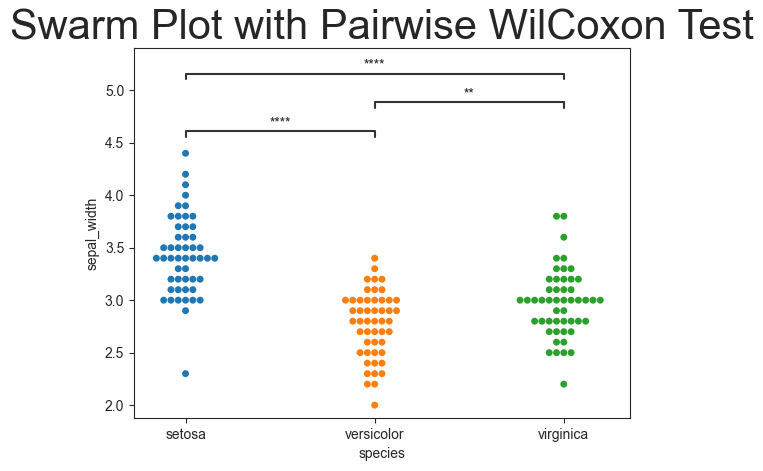

In [4]:
title = "Swarm Plot with Pairwise WilCoxon Test"

iris_plot.swarmplot(test='wilcoxon', group_col='species', value_col='sepal_width', title=title, fontsize=30,
                    return_df=True)

### Pairwise Mann-Whitney U

This is a non-parametric test used to determine if statistically significant differences occur between two independent groups. Unlike the pairise Wilcoxon tests (above), the measures for the Mann-Whitney U tests are not paired and there is less restrictions on the input data format.

Both the pairwise Mann-Whitney U and pairwise Wilcoxon tests and perform tests for both groups and subgroups within each group. The usage with subgroups will be demoed with the Seaborn tips dataset. 

In [5]:
tips = sns.load_dataset("tips")

# Initialize class
tips_stats = Stats(tips)
tips_plot = Plots(tips)

tips_stats.show(100)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
95,40.17,4.73,Male,Yes,Fri,Dinner,4
96,27.28,4.00,Male,Yes,Fri,Dinner,2
97,12.03,1.50,Male,Yes,Fri,Dinner,2
98,21.01,3.00,Male,Yes,Fri,Dinner,2


Pairwise Mann-Whitney U tests  are again called using the "get_X" format, where X is the name of a specific test. Additional parameters include the "subgroup_col". 

In [6]:
tips_stats.get_mannu(value_col='total_bill', group_col='time', subgroup_col='sex')

,A,B,U-val,p-val,significance,RBC,CLES
0,"(Dinner, Female)","(Dinner, Male)",2849.5,0.225232,n.s.,-0.116160,0.441920
1,"(Dinner, Female)","(Lunch, Male)",943.0,0.446076,n.s.,0.099068,0.549534
2,"(Dinner, Female)","(Lunch, Female)",1166.5,0.026695,*,0.281868,0.640934
3,"(Dinner, Male)","(Lunch, Male)",2483.5,0.059743,n.s.,0.213832,0.606916
4,"(Dinner, Male)","(Lunch, Female)",2994.5,0.000614,***,0.379954,0.689977
5,"(Lunch, Male)","(Lunch, Female)",679.5,0.212925,n.s.,0.176623,0.588312


The inclusion of the subgroup will have an impact on the final plot. In this case, the subgroups will be color coded and a figure legend will be included. The figure legend will be drawn and placed in a default location. If this interferes with the plot, it can be moved using plt.legend(). 

For readability, groups that have no significance will not be annotated. 

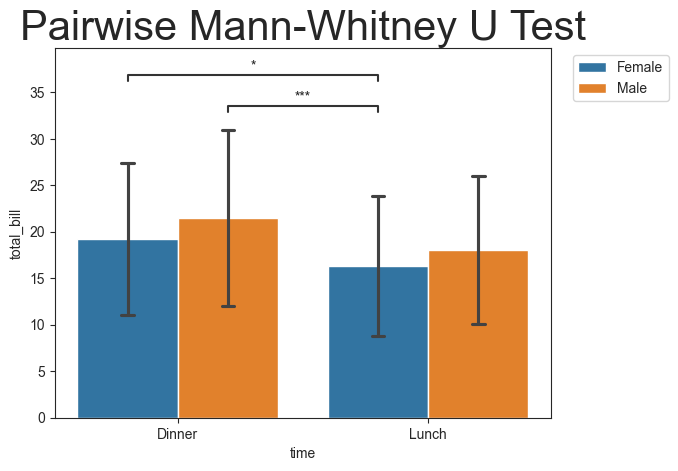

In [17]:
title = "Pairwise Mann-Whitney U Test"

pairs = [
    (('Dinner', 'Female'), ('Lunch', 'Female')),
    (('Dinner', 'Male'), ('Lunch', 'Female')),
]

tips_plot.barplot(test='mannu', value_col='total_bill', group_col='time', subgroup_col='sex', pairs=pairs,
                  title=title, fontsize=30)
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

As a reminder, the plots in py50 come with a lot of different methods for modification. In the figure above, Dinner is listed first. That is weird. I usually eat Lunch before Dinner? We can quickly modify this by including the **group_order** parameter.  

Changing the group orders will also modify the layout order for the significant figures. The significant figures can also be modified if users dislike the asterisk and prefer a more verbose description. This is done using the pvalue_order. The order of the pvalue_order parameter will follow the order of appearance in the statistics DataFrame. 

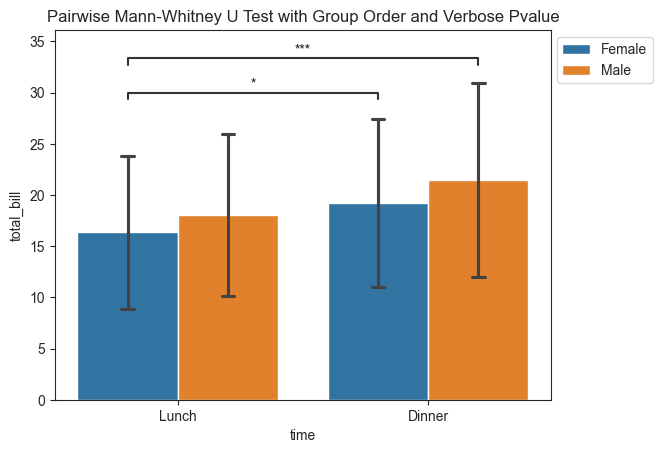

In [8]:
title = "Pairwise Mann-Whitney U Test with Group Order and Verbose Pvalue"

meal_order = ['Lunch', 'Dinner']
pvalue_order = ['p ≤ 0.05', 'p ≤ 0.001']

tips_plot.barplot(test='mannu', value_col='total_bill', group_col='time', subgroup_col='sex', pairs=pairs,
                  group_order=meal_order, pvalue_order=pvalue_order, title=title)
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1))

### Friedman Test
The Friedman test is a non-parametric test for repeated measures. The dataset must be in long format, i.e. each row represents a measurement. This requires both the group_col and the subgroup_col. 

For ease of use, the tips dataset will continue to be used. 

In [9]:
tips_stats.get_friedman(value_col='total_bill', group_col='sex', subgroup_col='day')

,Source,W,ddof1,Q,p-unc,significance
Friedman,sex,1.0,1,4.0,0.0455,*


The Friedman test suggest there is a difference between the sex column. Post-hoc tests can be performed using the get_pairwise_tests(). As the Friedman Test is non-parametric, the parametric argument must be set to False. The results can be plotted as shown in previous examples. 

In [10]:
tips_stats.get_pairwise_tests(value_col='total_bill', group_col='sex', parametric=False)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges,significance
0,sex,Female,Male,False,False,5613.5,two-sided,0.02135,-0.303494,*


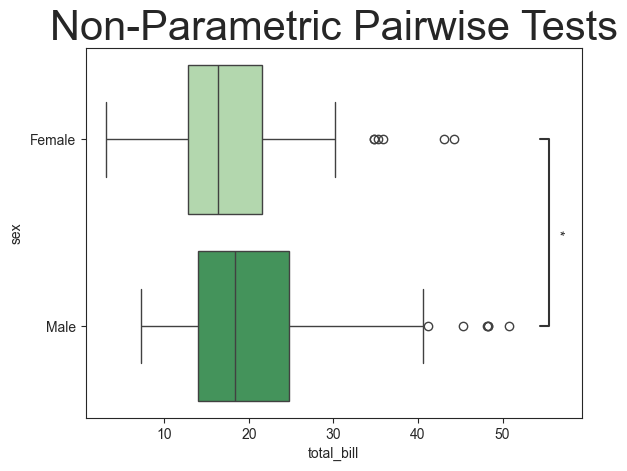

In [11]:
title = "Non-Parametric Pairwise Tests"
tips_plot.boxplot(value_col='total_bill', group_col='sex', test='pairwise-nonparametric', palette='Greens',
                  title=title, fontsize=30, orient='h')

### Kruskal-Wallis H Test
The Kruskal-Wallis test is a non-parametric method used to determine significant differences between two or more independent groups. Post-hoc tests can be performed to obtain pairwise differences. Again, the example here uses the pairwise-nonparametric as an example. 

For ease, the tip dataset will continue to be used. 

In [12]:
tips_stats.get_kruskal(value_col='tip', group_col='day')

,Source,ddof1,H,p-unc,significance
Kruskal,day,3,8.565588,0.035661,*


In [13]:
tips_stats.get_pairwise_tests(value_col='tip', group_col='day', parametric=False)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges,significance
0,day,Thur,Fri,False,False,561.0,two-sided,0.758381,0.030468,n.s.
1,day,Thur,Sat,False,False,2486.5,two-sided,0.417663,-0.148857,n.s.
2,day,Thur,Sun,False,False,1755.5,two-sided,0.010006,-0.388762,*
3,day,Fri,Sat,False,False,808.0,two-sided,0.881937,-0.166274,n.s.
4,day,Fri,Sun,False,False,533.5,two-sided,0.079741,-0.431509,n.s.
5,day,Sat,Sun,False,False,2652.0,two-sided,0.029497,-0.178644,*


For readability, groups with no significance were not annotated.  

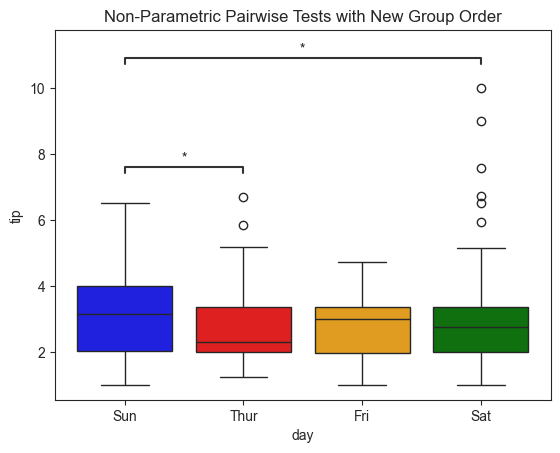

In [14]:
# Plot annotations
title = "Non-Parametric Pairwise Tests with New Group Order"
pairs = [('Sun', 'Sat'), ('Thur', 'Sun')]
group_order = ['Sun', 'Thur', 'Fri', 'Sat']
palette = ['red', 'orange', 'green', 'blue']

tips_plot.boxplot(value_col='tip', group_col='day', test='pairwise-nonparametric', group_order=group_order,
                  pairs=pairs, palette=palette, title=title)